<a href="https://colab.research.google.com/github/Santhosh141020/Minor-Project/blob/main/friuits_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###INCLUDE NECESSARY HEADER FILES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread,imshow
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


### IMPORTING IMAGES FOR TRAINING
Converting 2-D image into 1-D array

In [ ]:
category=['apple','blackberry','custardapple','pineapple']
path='/content/drive/MyDrive/minor project/minor1'
img_flat=[]
target=[]
for folder in os.listdir(path):
  index=category.index(folder)
  patha=os.path.join(path,folder)
  for img in os.listdir(patha):
    image=imread(os.path.join(patha,img))
    img_resize=resize(image,output_shape=(50,50,3)) #resizing the image
    img_flat.append(img_resize.flatten()) #converting it to 1-D array
    target.append(index)
img_flat=np.array(img_flat)
target=np.array(target)

### SPLITTING THE DATA INTO TRAINING AND TESTING

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(img_flat,target, test_size=0.3, random_state=20)

In [ ]:
x_train.shape

(111, 7500)

### CREATING MODEL 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(gamma='scale', probability=True)
parameter_grid = {'C':[1, 2, 3, 10, 100], 'kernel':['linear', 'rbf']}
classifier = GridSearchCV(estimator=model, param_grid=parameter_grid,scoring='accuracy',cv=5,n_jobs=-1)

#### Fitting the Model

In [ ]:
classifier.fit(x_train , y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 10, 100], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(y_train[1])
classifier.decision_function(x_train[0:2])

3


array([[ 0.84879979,  3.25234289,  1.8898447 , -0.21394345],
       [-0.23215482,  0.81714463,  2.0665329 ,  3.25509154]])

In [ ]:
best_parameters = classifier.best_params_
print("BEST_PARAMETERS:",best_parameters)

BEST_PARAMETERS: {'C': 2, 'kernel': 'rbf'}


In [ ]:
best_result = classifier.best_score_
print("BEST_SCORE: ",best_result)

BEST_SCORE:  0.9098814229249012


### Predicting the result for test data
#### Finding and plotting confusion Matrix
#### Finding Accuracy

Text(51.0, 0.5, 'True_Values')

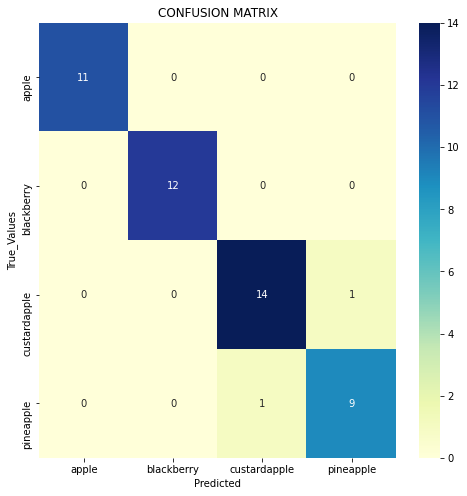

In [ ]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sb.heatmap(cm, annot=True, cmap="YlGnBu",xticklabels=category, yticklabels=category)
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True_Values")

In [ ]:
print('Accuracy : ',accuracy_score(y_test,y_pred)*100)

Accuracy :  95.83333333333334


### Predicting for the new data

In [ ]:
flat=[]
pred_path='/content/drive/MyDrive/minor project/predict'
actual=[]
for y in os.listdir(pred_path):
  pathb=os.path.join(pred_path,y)
  image=imread(pathb)
  y_resize=resize(image,output_shape=(50,50,3))
  flat.append(y_resize.flatten())
  actual.append(y)


#### Finding the probabilty score of how it predicts to which class it belongs

In [ ]:
pred=classifier.predict(flat)
print(classifier.decision_function(flat))

[[-0.18076808  3.23516771  1.93690579  0.83524765]
 [-0.18587613  3.21130876  0.89969556  1.98696097]
 [-0.17009679  1.88569818  3.24247456  0.82503334]
 [ 0.91163686  2.04750442  3.20619548 -0.19600738]
 [ 3.25016434  1.97917911  0.82320797 -0.21479022]
 [ 3.23806021  2.15517831  0.79705968 -0.21485141]
 [ 3.24893196  0.84168154  1.91548941 -0.21011117]
 [ 3.24544337  2.07734578 -0.21036989  0.80649151]
 [ 3.25007754  1.88741372  0.81693287 -0.18683999]
 [ 3.23690363  2.13890931  0.84461093 -0.23226105]
 [ 3.26905074  1.81839884 -0.21963866  0.82873425]
 [ 3.24126884  1.92329271  0.84859866 -0.1994407 ]
 [ 3.20714871  2.18799627  0.89176586 -0.23683588]
 [-0.19275742  0.84415182  3.17729233  2.17558712]
 [-0.14194039  0.84924842  2.13267505  3.1584548 ]
 [-0.15821375  1.87004005  3.23432376  0.84939566]]


In [ ]:
df=pd.DataFrame({'Actual_Fruit':actual,'Predicted_Fruit':pred})
df['Predicted_Fruit'].replace({0:'Apple',1:'Black Berry',2:'Custard Apple',3:'Pineapple'},inplace=True)
df

,Actual_Fruit,Predicted_Fruit
0,blackberry1.jpg,Black Berry
1,blackberry2.jpg,Black Berry
2,custardapple2.jpg,Custard Apple
3,custardapple1.jpg,Custard Apple
4,apple9.jpg,Apple
5,apple3.jpg,Apple
6,apple2.jpg,Apple
7,apple4.jpg,Apple
8,apple0.jpg,Apple
9,apple6.jpg,Apple
